In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
df_1 = pd.read_csv("heat_data_fig_1_python.csv").set_index("Country")
df_2 = pd.read_csv("heat_data_fig_2_python.csv").set_index("Country")


In [3]:
font= 'Microsoft Yi Baiti'

text_props = {'fontsize': 25, 'fontname':font}
title_props =  {'fontsize': 35, 'fontname':font, 'verticalalignment':'baseline'} 
legend_pie_props = {'size':20, 'family':font}
legend_bar_props = {'size':25, 'family':font}
matplotlib.rcParams['font.family'] = font
matplotlib.rcParams["figure.facecolor"] = "w"
face_color = "white"
pie_size = (14,14)
bar_size = (20,12)
bar_font = 30

RE_explode = [0,0,0,0,0.1,0.1,0.1,0.1]

In [4]:

gas = '#8c564b'
oil = '#7f7f7f'
other_fossils = '#c7c7c7'
heat_pumps = '#c5b0d5'
direct_re = '#2ca02c'
district_heat = '#d62728'
electricity = '#1f77b4'
non_re_elec = '#ffbb78'
re_elec = '#98df8a'
re_DHC = '#d62728'
ambient = '#17becf'


colors_1 = [gas, oil, other_fossils, heat_pumps, direct_re, district_heat, electricity]
colors_2 = [gas, oil, other_fossils, non_re_elec, re_elec, direct_re, re_DHC, ambient]

c_Dict = {'Fossil gas':'tab:blue', 'Oil':'tab:orange', 'Other fossil fuels':'tab:green', 
'Heat pumps':'tab:red', 'Direct renewables':'tab:purple', 'District heat':'tab:brown', 'Electricity':'tab:pink'
}

# old HEX for re_DHC --> '#9edae5'

In [5]:

colors = sns.color_palette("tab20")
palette = sns.color_palette("tab20", 20).as_hex()
print(palette)
palette

['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c', '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5', '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f', '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']


['#1f77b4',
 '#aec7e8',
 '#ff7f0e',
 '#ffbb78',
 '#2ca02c',
 '#98df8a',
 '#d62728',
 '#ff9896',
 '#9467bd',
 '#c5b0d5',
 '#8c564b',
 '#c49c94',
 '#e377c2',
 '#f7b6d2',
 '#7f7f7f',
 '#c7c7c7',
 '#bcbd22',
 '#dbdb8d',
 '#17becf',
 '#9edae5']

In [6]:
df_2

,Fossil gas,Oil,Other fossil fuels,Non-renewable electricity,Renewable electricity,Direct renewables,Renewable district heat,Ambient heat
Country,,,,,,,,
Canada,1326,82,53,128,252,170,0,0
Denmark,26,7,30,1,5,43,40,10
France,757,225,44,240,62,277,43,115
Germany,1263,624,184,162,134,465,37,0
Scotland,104,12,3,0,14,6,0,0
United Kingdom,1361,199,20,143,108,96,0,0
United States,5112,1038,0,1067,259,826,0,0


In [7]:
cmap = matplotlib.cm.get_cmap('tab20')
for i in range(cmap.N):
    rgba = cmap(i)
    print(f"Hex: {matplotlib.colors.rgb2hex(rgba)}")

Hex: #1f77b4
Hex: #aec7e8
Hex: #ff7f0e
Hex: #ffbb78
Hex: #2ca02c
Hex: #98df8a
Hex: #d62728
Hex: #ff9896
Hex: #9467bd
Hex: #c5b0d5
Hex: #8c564b
Hex: #c49c94
Hex: #e377c2
Hex: #f7b6d2
Hex: #7f7f7f
Hex: #c7c7c7
Hex: #bcbd22
Hex: #dbdb8d
Hex: #17becf
Hex: #9edae5


In [31]:
labels_1 = df_1.columns
labels_2 = df_2.columns
plot_1 = [df_1, colors_1, labels_1, F"What fuels are used in ", "fig_1"]
plot_2 = [df_2, colors_2, labels_2, "How clean is the heat in ", "fig_2"]

Index(['Fossil gas', 'Oil', 'Other fossil fuels', 'Non-renewable electricity',
       'Renewable electricity', 'Direct renewables', 'Renewable district heat',
       'Ambient heat'],
      dtype='object')

In [9]:
df_1

,Fossil gas,Oil,Other fossil fuels,Heat pumps,Direct renewables,District heat,Electricity
Country,,,,,,,
Canada,1326,82,53,0,170,0,381
Denmark,26,7,0,10,43,69,6
France,757,225,1,183,277,86,235
Germany,1263,624,13,0,465,208,297
Scotland,104,12,3,0,6,0,14
United Kingdom,1361,199,20,0,96,0,252
United States,5112,1038,0,0,826,0,1326


In [10]:
def plot_country(country, df, colors, labels, title, name):
    fig = plt.figure(figsize = pie_size)
    plt.pie(df.loc[country], colors=colors, startangle=90, autopct=lambda p: '{:.0f}%'.format(round(p)) if p > 0 else '', textprops=text_props)
    plt.title(title+f"{country}?", fontdict=title_props, y=0.95)
    plt.legend(labels=labels, prop=legend_pie_props, loc = 8, ncol=3, edgecolor='white', framealpha=0)
    centre_circle = plt.Circle((0,0),0.70,fc=face_color)
    ax = fig.gca()
    ax.add_artist(centre_circle)
    plt.tight_layout()
    plt.savefig(f"Exported/{country}_{name}")
    plt.show()

In [11]:
""" TESTING THE PLOTS """

#plot_country("Canada", *plot_1)
#plot_country("Denmark", *plot_2)

' TESTING THE PLOTS '

In [12]:
def plot_all_figs():
    for country in df_1.index:
        plot_country(country, *plot_1)

    for country in df_2.index:
        plot_country(country, *plot_2)

In [ ]:
""" SAVING THE FIGURES """
plot_all_figs()

### Stacked bar chart

In [14]:
df_1

,Fossil gas,Oil,Other fossil fuels,Heat pumps,Direct renewables,District heat,Electricity
Country,,,,,,,
Canada,1326,82,53,0,170,0,381
Denmark,26,7,0,10,43,69,6
France,757,225,1,183,277,86,235
Germany,1263,624,13,0,465,208,297
Scotland,104,12,3,0,6,0,14
United Kingdom,1361,199,20,0,96,0,252
United States,5112,1038,0,0,826,0,1326


In [22]:
def normalize(df):
    tot = df.sum(axis=1)
    for col in df:
        df[col] /= tot
    return df

df_1_share = normalize(df_1)
df_2_share = normalize(df_2)

df_2_share

,Fossil gas,Oil,Other fossil fuels,Non-renewable electricity,Renewable electricity,Direct renewables,Renewable district heat,Ambient heat
Country,,,,,,,,
Canada,0.659373,0.040776,0.026355,0.063650,0.125311,0.084535,0.000000,0.000000
Denmark,0.160494,0.043210,0.185185,0.006173,0.030864,0.265432,0.246914,0.061728
France,0.429382,0.127623,0.024957,0.136132,0.035167,0.157119,0.024390,0.065230
Germany,0.440223,0.217497,0.064134,0.056466,0.046706,0.162077,0.012896,0.000000
Scotland,0.748201,0.086331,0.021583,0.000000,0.100719,0.043165,0.000000,0.000000
United Kingdom,0.706279,0.103269,0.010379,0.074209,0.056046,0.049818,0.000000,0.000000
United States,0.615755,0.125030,0.000000,0.128523,0.031197,0.099494,0.000000,0.000000


In [32]:
order_1 = ["Scotland", "United Kingdom", "Canada", "United States", "Germany", "France", "Denmark"] # most gas
order_2 = ["Denmark", "France", "Germany", "Canada", "Scotland", "United States", "United Kingdom"] # highest RE share

df_1_share = df_1_share.reindex(order_1)
labels_1 = df_1_share.columns

df_2_share = df_2_share.reindex(order_2)
labels_2 = df_2_share.columns
df_2_share

,Fossil gas,Oil,Other fossil fuels,Non-renewable electricity,Renewable electricity,Direct renewables,Renewable district heat,Ambient heat
Country,,,,,,,,
Denmark,0.160494,0.043210,0.185185,0.006173,0.030864,0.265432,0.246914,0.061728
France,0.429382,0.127623,0.024957,0.136132,0.035167,0.157119,0.024390,0.065230
Germany,0.440223,0.217497,0.064134,0.056466,0.046706,0.162077,0.012896,0.000000
Canada,0.659373,0.040776,0.026355,0.063650,0.125311,0.084535,0.000000,0.000000
Scotland,0.748201,0.086331,0.021583,0.000000,0.100719,0.043165,0.000000,0.000000
United States,0.615755,0.125030,0.000000,0.128523,0.031197,0.099494,0.000000,0.000000
United Kingdom,0.706279,0.103269,0.010379,0.074209,0.056046,0.049818,0.000000,0.000000


In [33]:
plot_share_1 = [df_1_share, colors_1, labels_1, "What fuels are used to heat?", "fig_1"]
plot_share_2 = [df_2_share, colors_2, labels_2, "How clean is the heat?", "fig_2"]

In [17]:
def plot_bars(df, colors, labels, title, name):
    df.plot(kind='bar', stacked=True, figsize=(bar_size), color=colors, width=0.3)
    plt.legend(handles = reversed(plt.legend().legendHandles), labels = reversed(labels), bbox_to_anchor=(1.15, 0.5), prop=legend_bar_props, loc = 9, ncol=1, framealpha=0)
    plt.grid(alpha=0.4, axis='y')
    plt.title(title, fontdict=title_props, y =1.05)
    plt.xlabel(xlabel='', fontdict=text_props)
    plt.xticks(rotation=45, fontfamily=font, fontsize=bar_font)
    plt.ylabel('Share', fontfamily=font, fontsize=bar_font)
    plt.yticks(fontfamily=font, fontsize=bar_font)
    plt.margins(y=0)
    plt.tight_layout()
    plt.savefig(f"Exported/all_countries_{name}")
    plt.show()

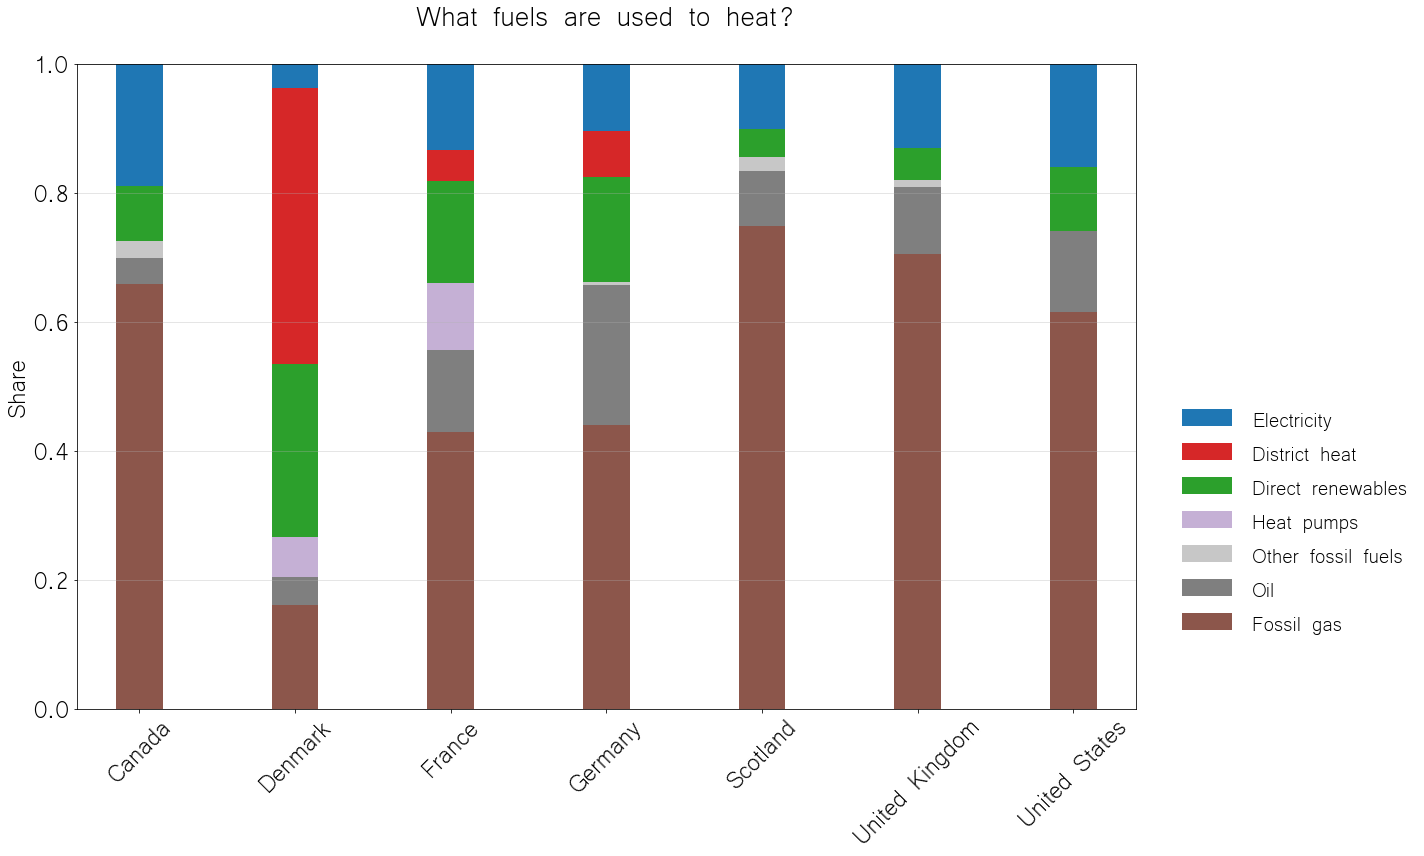

In [35]:
plot_bars(*plot_share_1)

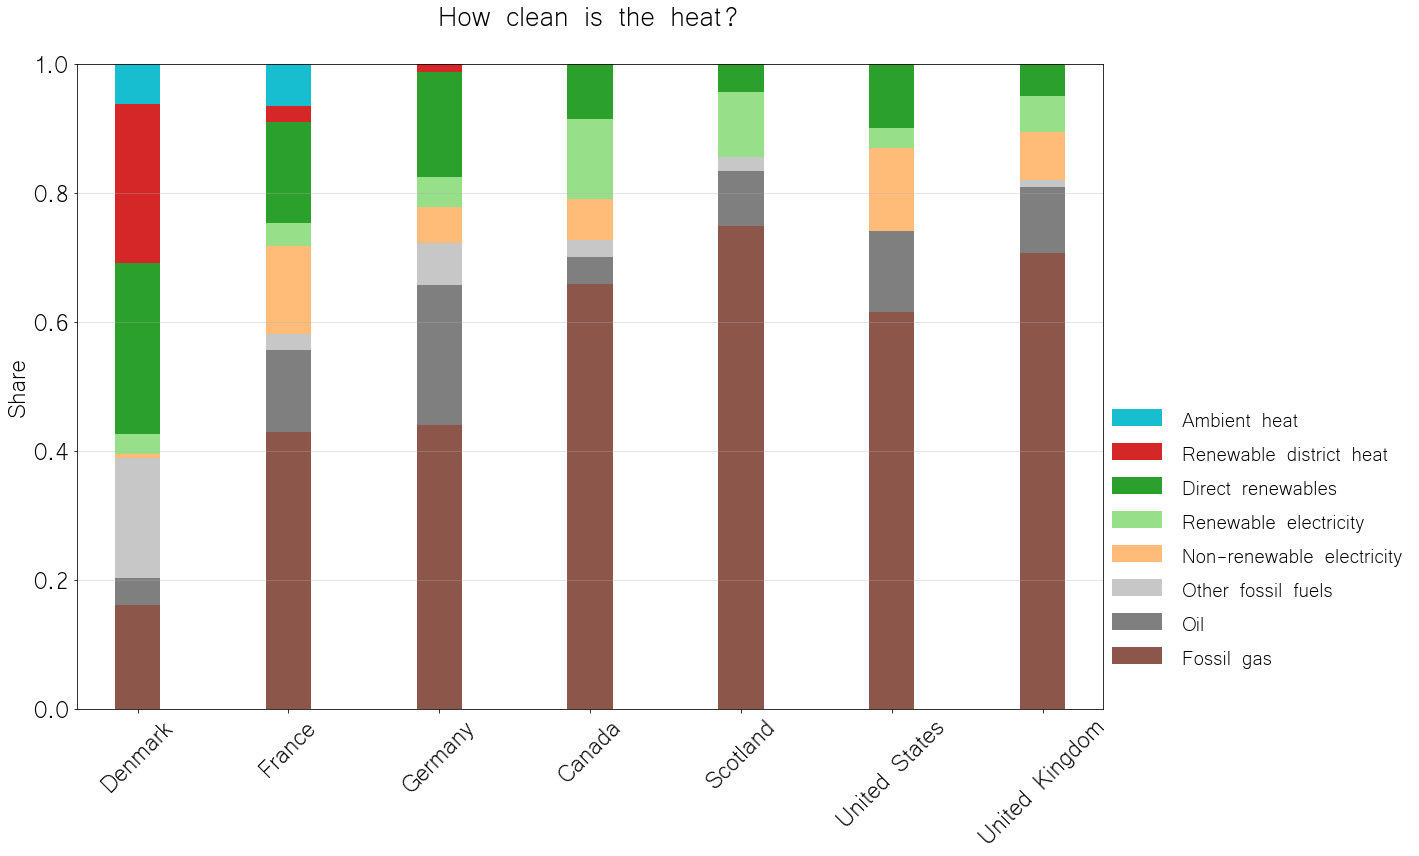

In [34]:
plot_bars(*plot_share_2)